In [1]:
from support.df_init import init
from support.imputation import impute_data

df = init()

imputed, _ = impute_data(train=df)
imputed

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,reviewsTotal,deltaYear
0,Carmencita,"(5, 6]",1894,1894.0,17.0,0,2089,1,10,2,...,0.399732,1,0,0,0,0,0,0,19,0.0
1,Un bon bock,"(5, 6]",1892,1892.0,12.0,0,183,1,10,2,...,0.046115,0,0,0,1,0,0,0,1,0.0
2,Chinese Opium Den,"(4, 5]",1894,1894.0,17.0,0,195,1,10,1,...,0.399732,1,0,0,0,0,0,0,0,0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1894.0,17.0,1,2237,1,10,3,...,0.399732,1,0,0,0,0,0,0,22,0.0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1896.0,17.0,0,13115,1,10,12,...,0.046115,0,0,0,1,0,0,0,27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,1993.0,96.0,0,11,1,10,0,...,0.001417,0,0,0,0,0,1,0,0,0.0
149527,Eco,"(6, 7]",2019,2019.0,14.0,0,15,1,10,4,...,0.017834,0,0,0,1,0,0,0,1,0.0
149528,Women Take Center Stage,"(5, 6]",2019,2019.0,30.0,0,12,1,10,2,...,0.000000,0,0,0,0,0,0,0,0,0.0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,2011.0,24.0,0,9,1,10,1,...,0.000000,0,0,0,0,0,0,0,0,0.0


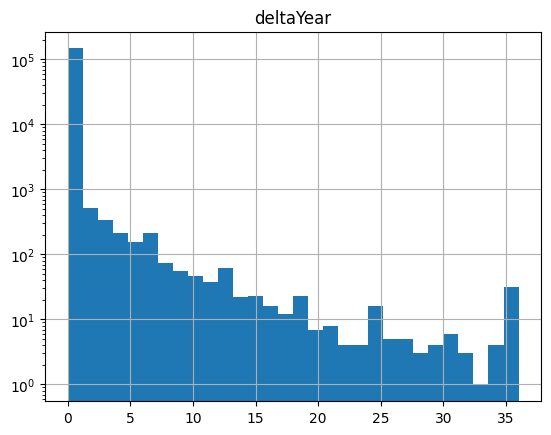

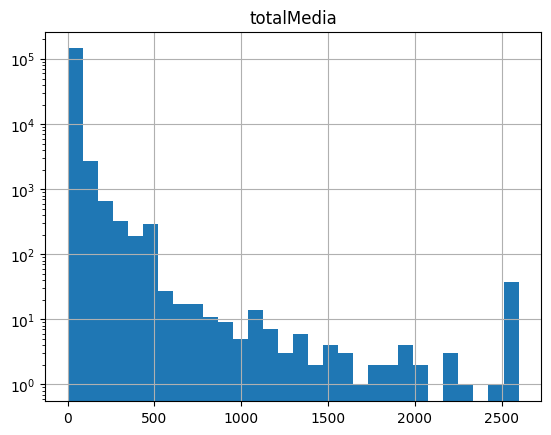

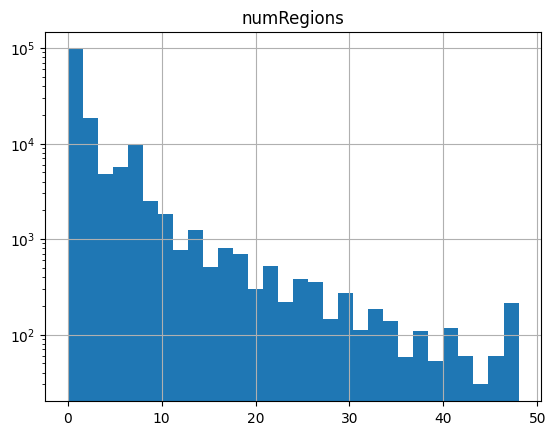

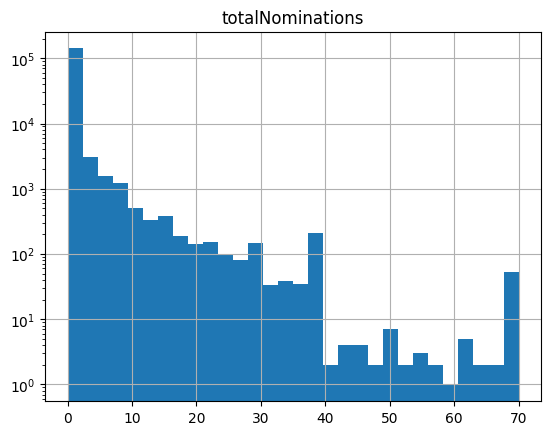

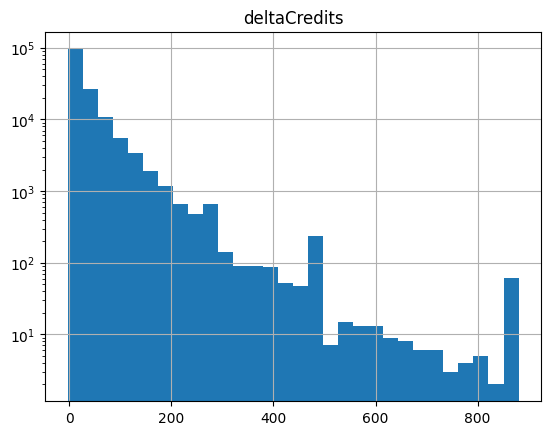

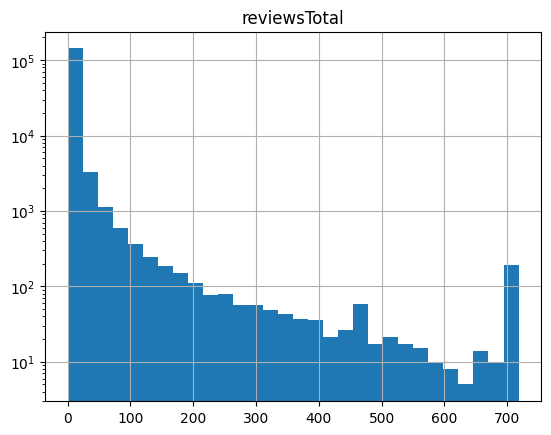

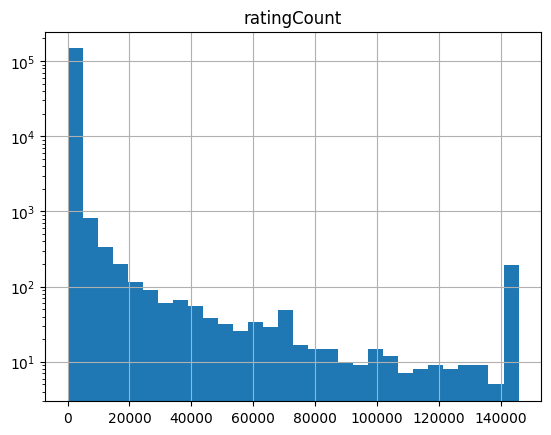

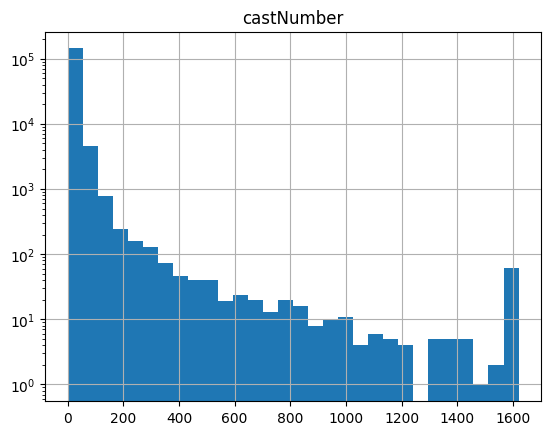

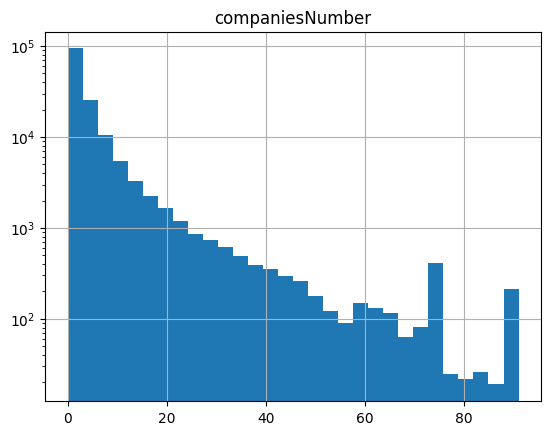

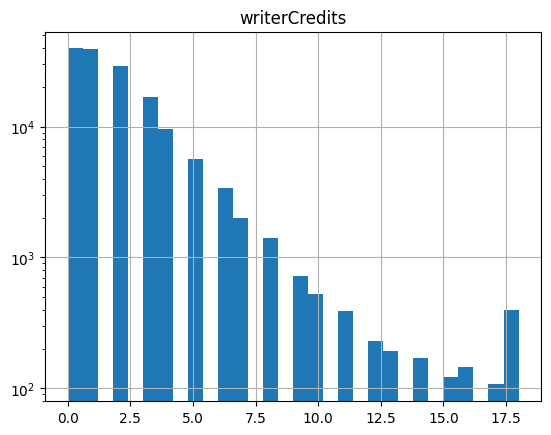

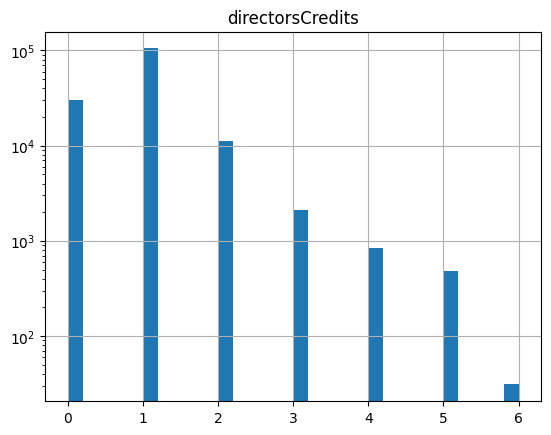

In [2]:
from support.imputation import plaw_like
import matplotlib.pyplot as plt

for feat in plaw_like:
    imputed[feat].hist(bins=30)
    plt.title(feat)
    plt.yscale('log')
    plt.show()

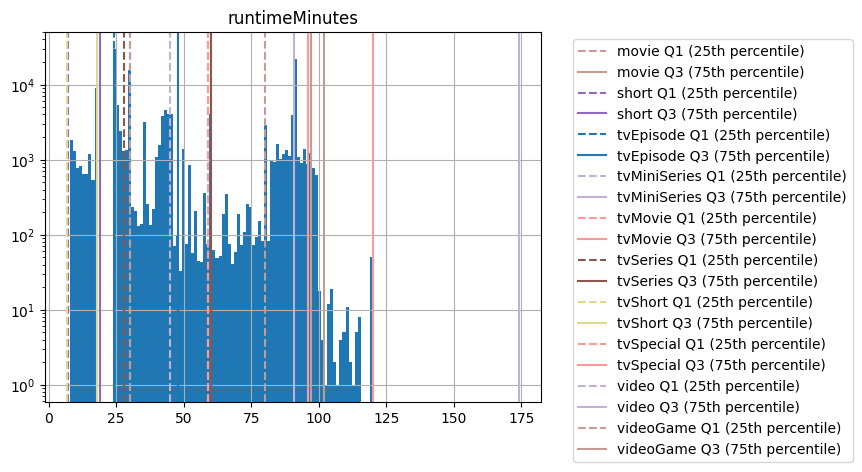

In [3]:
imputed['runtimeMinutes'].hist(bins=100)
plt.title('runtimeMinutes')
plt.yscale('log')


# Compute and plot IQR for each titleType
for title_type, group in df.groupby('titleType'):
    q1 = group['runtimeMinutes'].quantile(0.25)
    q3 = group['runtimeMinutes'].quantile(0.75)
    color = plt.cm.tab20(hash(title_type) % 20)  # Generate a consistent color for each titleType
    plt.axvline(q1, color=color, linestyle='--', label=f'{title_type} Q1 (25th percentile)')
    plt.axvline(q3, color=color, linestyle='-', label=f'{title_type} Q3 (75th percentile)')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()